## Imports and EDA

In [1]:
# Import libraries
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from neural_net import NeuralNet

In [2]:
# Define header names

headers = ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

# Make DF

heart_df = pd.read_csv('heart.dat', sep = ' ', names = headers)

In [3]:
# Check shape of DF
heart_df.shape

(270, 14)

In [4]:
# Check for na's

heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [5]:
# Check datatypes

heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [6]:
# Define training set

X = heart_df.drop(columns = ['heart_disease'])

# Enumerate target class i.e. labels
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1,0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2,1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

# Make train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size = 0.2, random_state = 2)

In [7]:
# Scale values

sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


## Define Neural Net

In [9]:
nn = NeuralNet()

In [10]:
nn.fit(Xtrain, ytrain)

Training epoch 0, calculated loss: 1.406818099455712
Training epoch 1, calculated loss: 1.2283644538724772
Training epoch 2, calculated loss: 1.1027579343396263
Training epoch 3, calculated loss: 1.010277834670556
Training epoch 4, calculated loss: 0.9375456811690593
Training epoch 5, calculated loss: 0.8771342674193834
Training epoch 6, calculated loss: 0.8256029193292977
Training epoch 7, calculated loss: 0.7809976438171825
Training epoch 8, calculated loss: 0.7419983603962279
Training epoch 9, calculated loss: 0.707447080573352
Training epoch 10, calculated loss: 0.6761308099914313
Training epoch 11, calculated loss: 0.6479719529677453
Training epoch 12, calculated loss: 0.6225758410329949
Training epoch 13, calculated loss: 0.5995873203513066
Training epoch 14, calculated loss: 0.5787978131048888
Training epoch 15, calculated loss: 0.5599182115487729
Training epoch 16, calculated loss: 0.5427118970422696
Training epoch 17, calculated loss: 0.5270878681118275
Training epoch 18, calc

Training epoch 243, calculated loss: 0.20484343749057887
Training epoch 244, calculated loss: 0.20441927750730154
Training epoch 245, calculated loss: 0.2040126296924069
Training epoch 246, calculated loss: 0.20362076530831855
Training epoch 247, calculated loss: 0.20319828652626068
Training epoch 248, calculated loss: 0.20277780790284053
Training epoch 249, calculated loss: 0.20236571298216968
Training epoch 250, calculated loss: 0.20195238099992036
Training epoch 251, calculated loss: 0.20156261838124942
Training epoch 252, calculated loss: 0.20115952703475037
Training epoch 253, calculated loss: 0.2007483563441138
Training epoch 254, calculated loss: 0.2003377703110201
Training epoch 255, calculated loss: 0.1999290356881397
Training epoch 256, calculated loss: 0.19954320203371445
Training epoch 257, calculated loss: 0.199182485115241
Training epoch 258, calculated loss: 0.19880105043699905
Training epoch 259, calculated loss: 0.19840192422729222
Training epoch 260, calculated loss: 

Training epoch 399, calculated loss: 0.15742515984689748
Training epoch 400, calculated loss: 0.1571858211718213
Training epoch 401, calculated loss: 0.15698599481324108
Training epoch 402, calculated loss: 0.1567750978752191
Training epoch 403, calculated loss: 0.15655796423517826
Training epoch 404, calculated loss: 0.1563291245160032
Training epoch 405, calculated loss: 0.1561085345953448
Training epoch 406, calculated loss: 0.155913303447273
Training epoch 407, calculated loss: 0.15569104338576284
Training epoch 408, calculated loss: 0.1554782958364362
Training epoch 409, calculated loss: 0.15524938642490338
Training epoch 410, calculated loss: 0.1550566188530461
Training epoch 411, calculated loss: 0.15484971009912843
Training epoch 412, calculated loss: 0.15462897713674464
Training epoch 413, calculated loss: 0.1543972762265905
Training epoch 414, calculated loss: 0.1542018293446751
Training epoch 415, calculated loss: 0.15398717441734588
Training epoch 416, calculated loss: 0.15

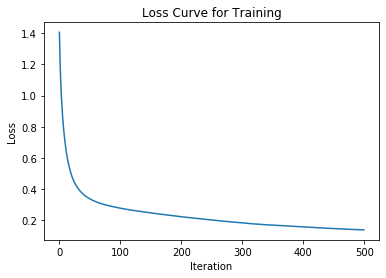

In [12]:
nn.plot_loss()

In [13]:
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

In [14]:
print("Train accuracy is {}".format(nn.accuracy(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.accuracy(ytest, test_pred)))

Train accuracy is 94
Test accuracy is 68
